## Stable Diffusion Text-to-Image Generation on IPU

This notebook demonstrates how a stable diffusion inference pipeline can be run on Graphcore IPUs.

### Requirements

* An enabled Poplar SDK environment (or Paperspace account with access to the PyTorch IPU runtime)
* Additional dependencies installable via pip (done below)
* Access to the pretrained Stable-Diffusion-v1-5 checkpoint (done below)

In [ ]:
%%capture
!pip install -r requirements.txt
!pip install "ipywidgets>=7,<8"

To download the pretrained Stable-Diffusion-v1-5 checkpoint, we must first authenticate to the Hugging Face Hub. Begin by storing your authentication token from the Hugging Face website (sign up [here](https://huggingface.co/join) if you haven't already!) then execute the following cell and input your read token:

In [ ]:
from huggingface_hub import notebook_login

notebook_login()

If you have not done so already, you will need to accept the User License on the [model page](https://huggingface.co/runwayml/stable-diffusion-v1-5).

We are now ready to import and run the pipeline.

In [ ]:
import torch

from ipu_models import IPUStableDiffusionPipeline

In [ ]:
pipe = IPUStableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5", 
    revision="fp16", 
    torch_dtype=torch.float16,
)
pipe.enable_attention_slicing()

We run a dummy generation step to trigger the one-time compilation process. This should take on the order of 15 minutes.

In [ ]:
pipe("apple", guidance_scale=7.5);

Below you will find some example prompts. We encourage you to try your own!

  0%|          | 0/51 [00:00<?, ?it/s]

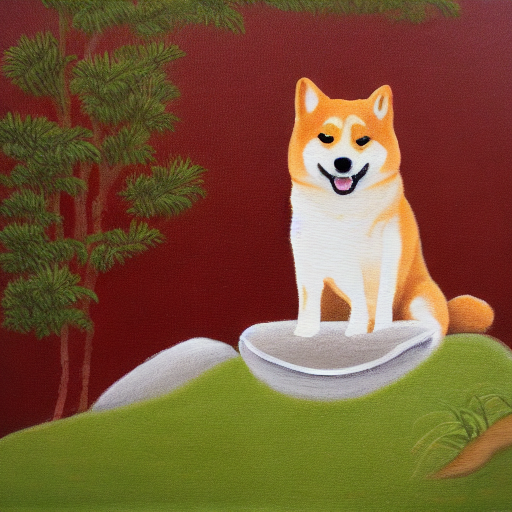

In [24]:
prompt = "a shiba inu in a zen garden, acrylic painting"
pipe(prompt, guidance_scale=7.5).images[0]

  0%|          | 0/51 [00:00<?, ?it/s]

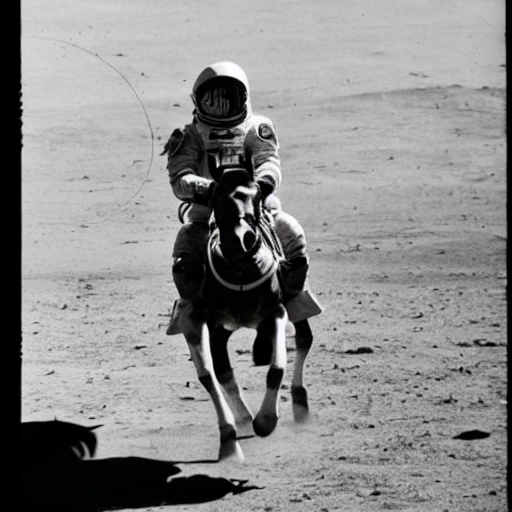

In [27]:
prompt = "a photograph of an astronaut riding a horse"
pipe(prompt, guidance_scale=7.5).images[0]

  0%|          | 0/51 [00:00<?, ?it/s]

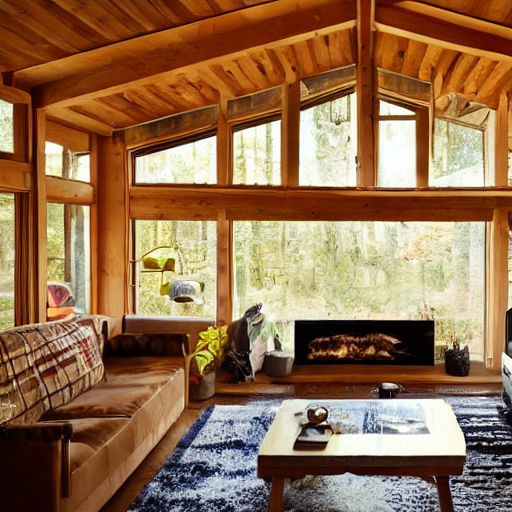

In [28]:
prompt = "the living room of a cozy wooden house with a fireplace"
pipe(prompt, guidance_scale=7.5).images[0]